In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
def line_slope(x_1,y_1,x_2,y_2):
    if(y_1 == y_2):
        return 0
    return abs((y_2 - y_1) / (x_2 - x_1))

In [3]:
def filter_line(lines):
    a = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if( x2 == x1):
            continue
        slope = (y2 - y1) / (x2 - x1)
        if(abs(slope) < 0.5):
            a.append(line)
    return a

In [4]:
def select_line_slope(lines):
    select_line = lines[0][0]
    for line in lines[1:]:
        x1, y1, x2, y2 = select_line
        x3, y3, x4, y4 = line[0]
        if(x3==x4):
            continue
        if(line_slope(x3,y3,x4,y4) < line_slope(x1,y1,x2,y2)):
            # if(slope(x3,y3,x4,y4) - slope(x1,y1,x2,y2) < 0.005):
            if(line_slope(x1,y1,x2,y2) - line_slope(x3,y3,x4,y4) < 0.4): # old 0.05
                if(math.dist([x1,y1],[x2,y2]) - 10 > math.dist([x3,y3],[x4,y4])):
                    continue
            select_line = line[0]
        else:
            if(line_slope(x3,y3,x4,y4) - line_slope(x1,y1,x2,y2) < 0.4):
                if(math.dist([x3,y3],[x4,y4]) - 10 > math.dist([x1,y1],[x2,y2])):
                    select_line = line[0]
    return select_line

In [5]:
def midpoint(p1, p2):
    return (p1+p2)/2  

001
[205.5 117. ]


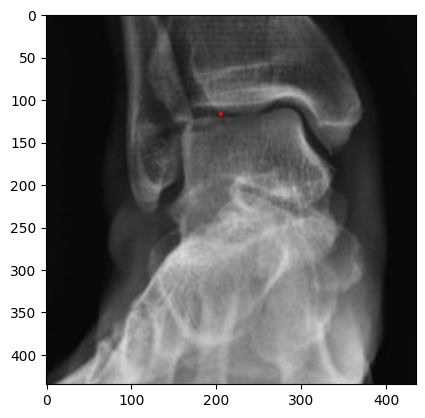

002
[241.  203.5]


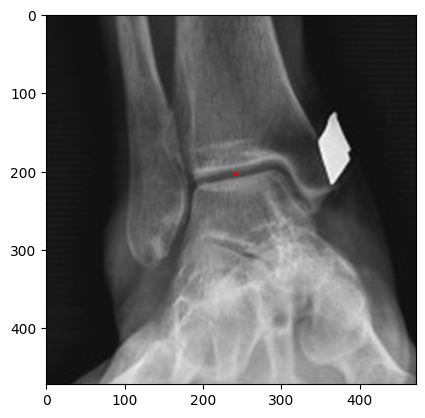

003
[221.  160.5]


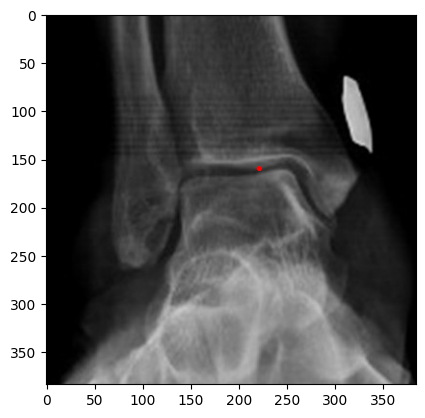

004
[232.5  94. ]


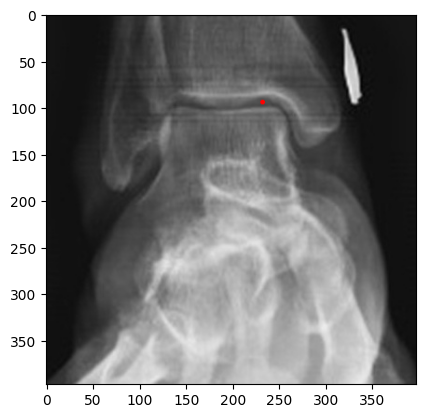

005
[320.5 182. ]


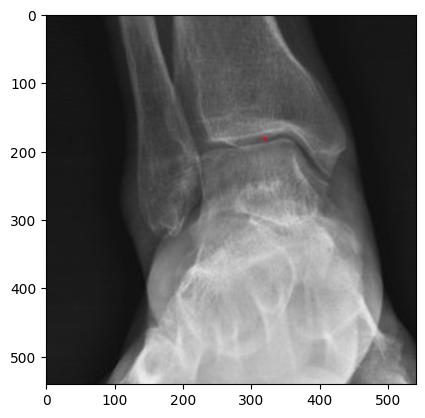

006
[276.5 152.5]


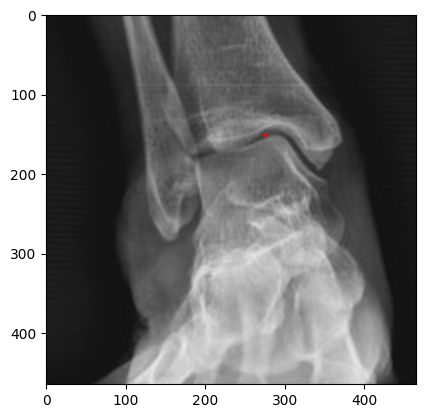

007
[240.5 179.5]


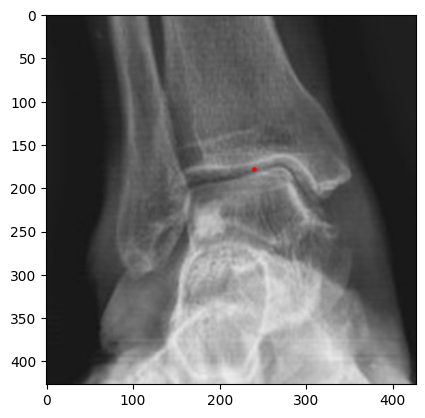

008
[236. 172.]


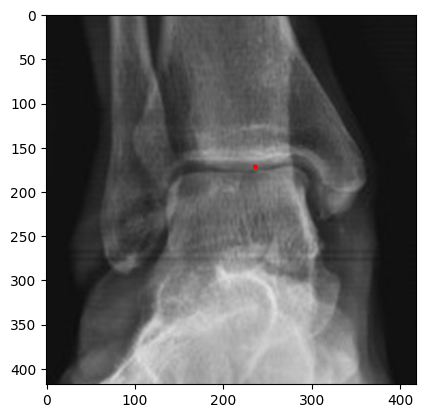

009
[235.5 194. ]


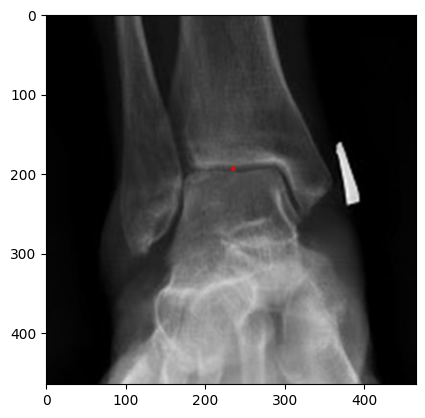

010
[220.  167.5]


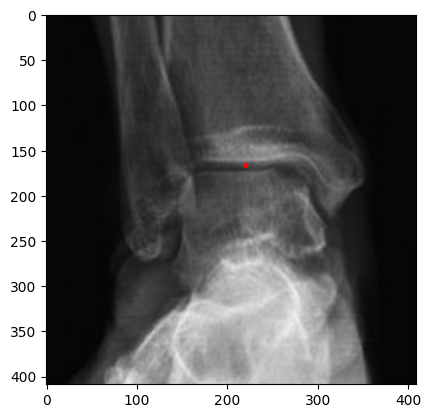

011
[258. 181.]


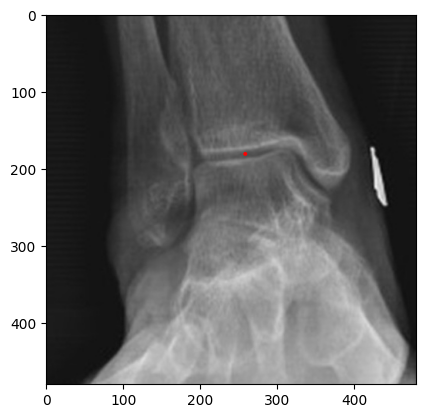

012
[201. 143.]


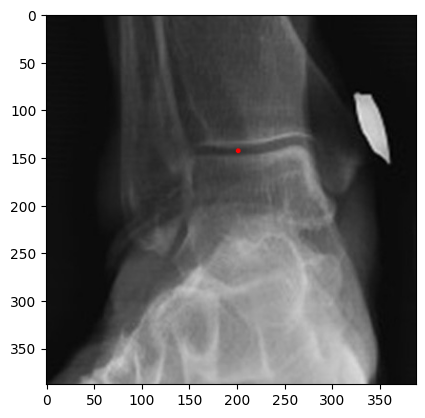

013
[236.  181.5]


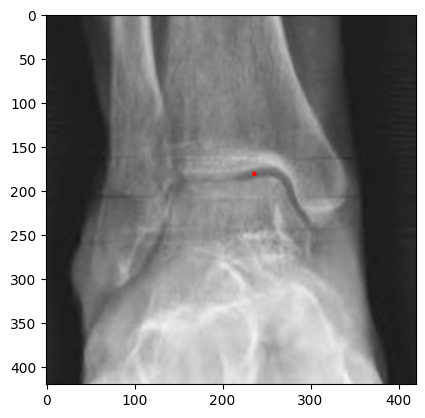

014
[198.5 199.5]


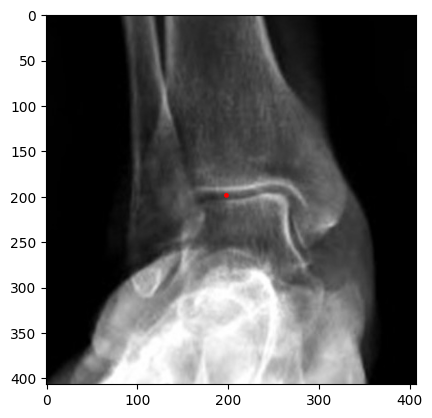

015
[239.  161.5]


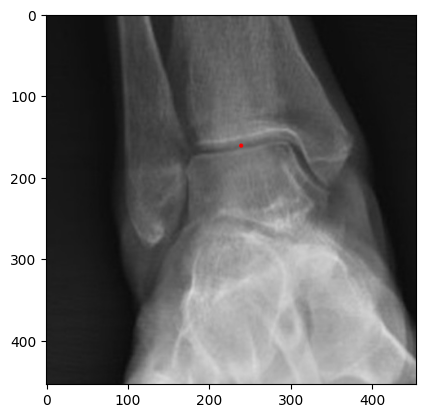

016
[237.5 167.5]


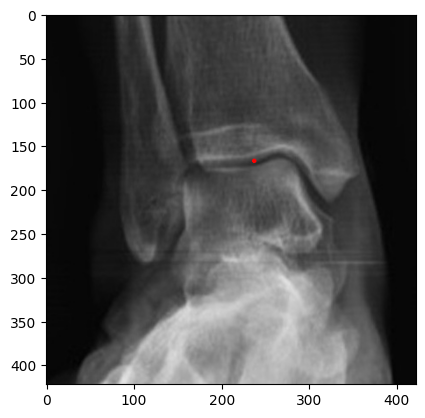

017
[240.5 188.5]


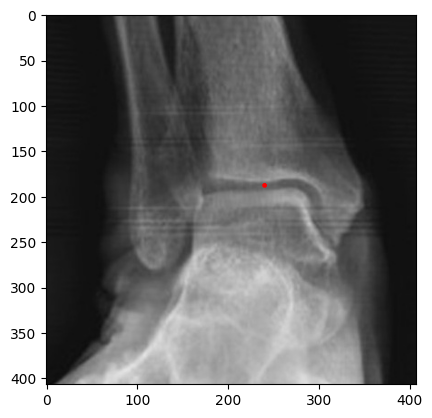

018
[245. 154.]


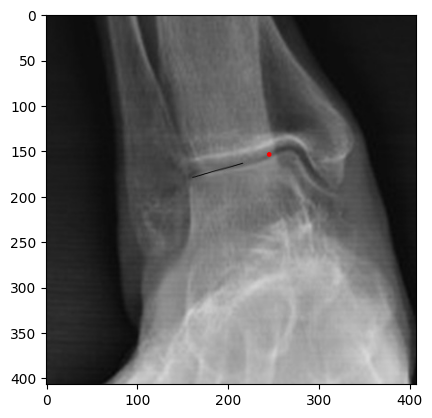

019
[228. 200.]


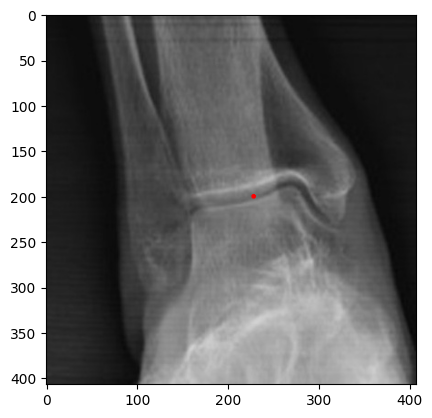

020
[190. 196.]


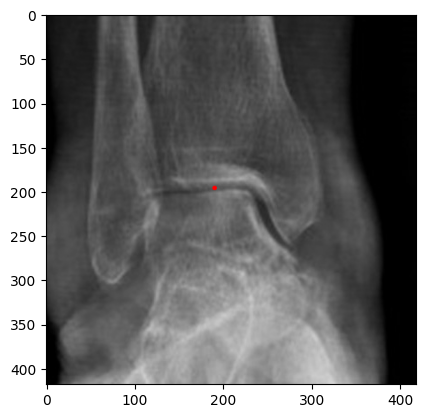

021
[201.5 184.5]


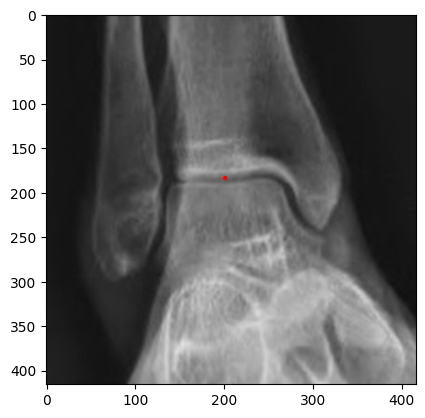

022
[224.5 159. ]


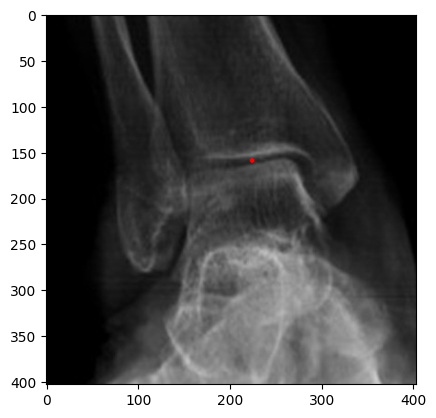

023
[260.  160.5]
yes


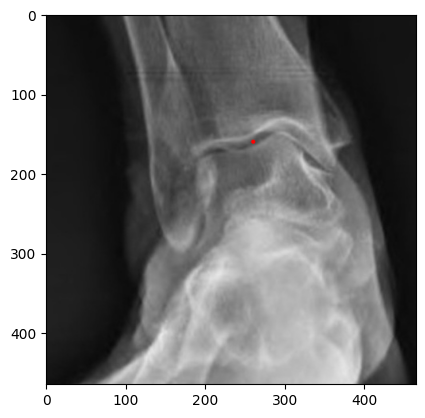

024
[233.5 191.5]


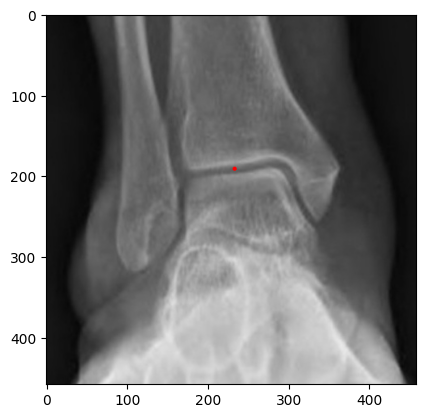

025
[193. 140.]


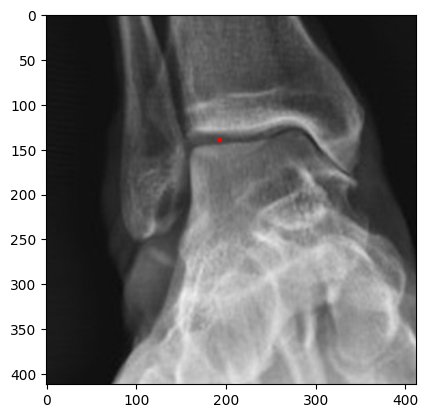

026
[232.  161.5]


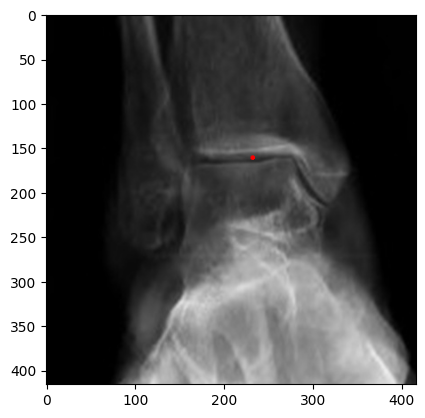

027
[240. 127.]


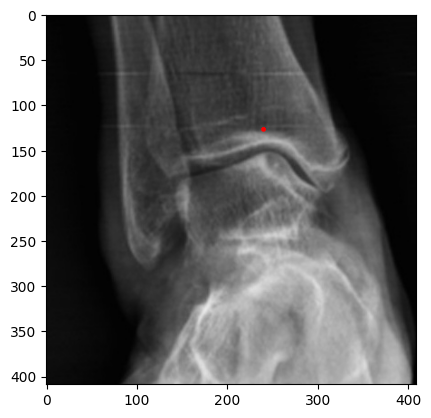

028
[228. 215.]


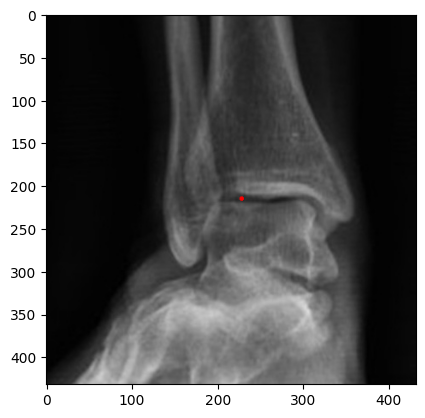

029
[221.5  90.5]


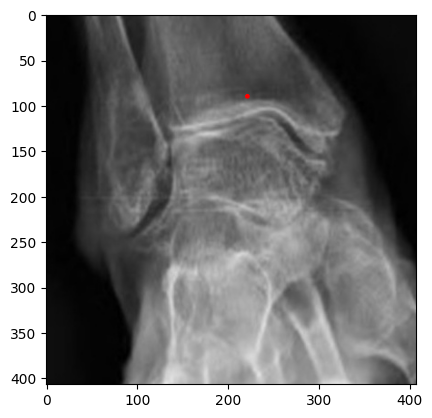

030
[199.5 197. ]


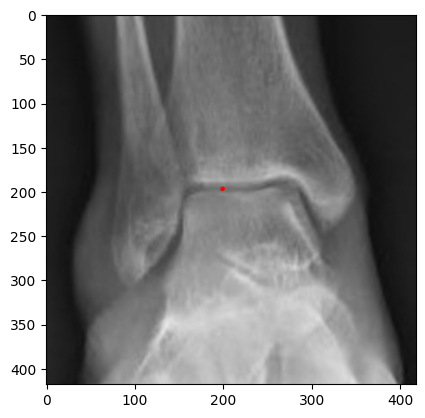

031
[203.5 186.5]


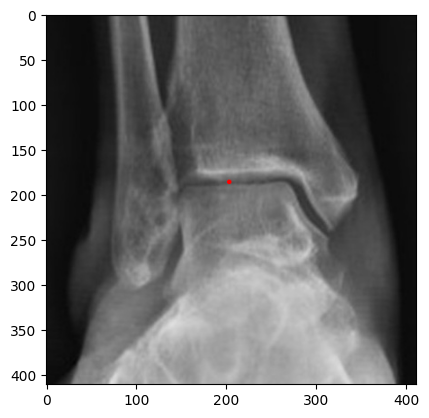

032
[193. 136.]


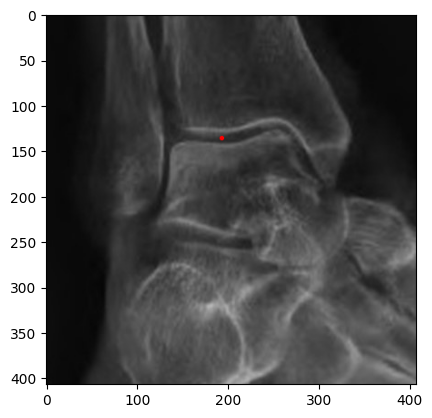

033
[251.  154.5]


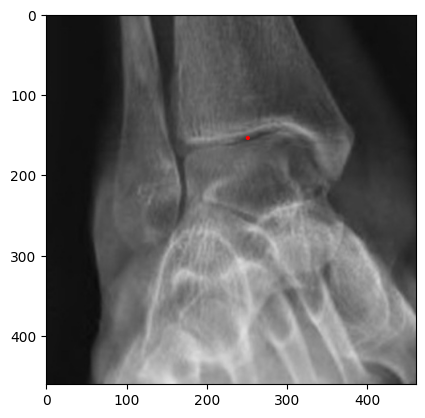

034
[197.5 151.5]


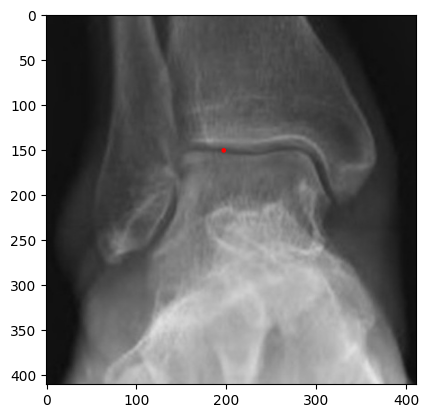

035
[278. 263.]


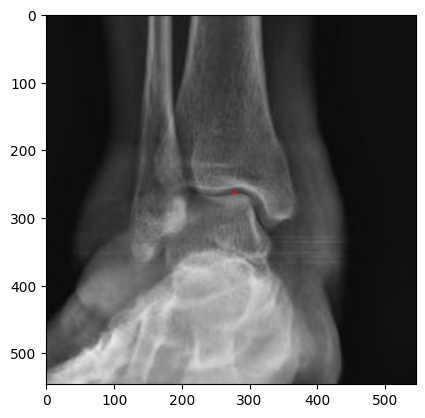

036
[193.5 177. ]


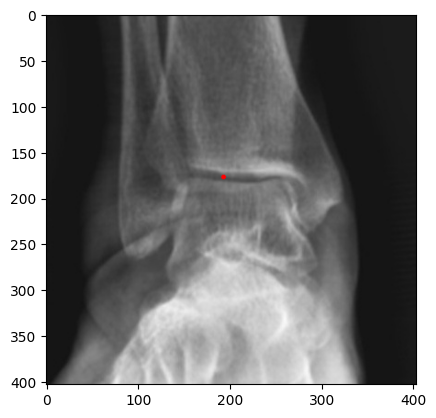

037
[223.5 172. ]


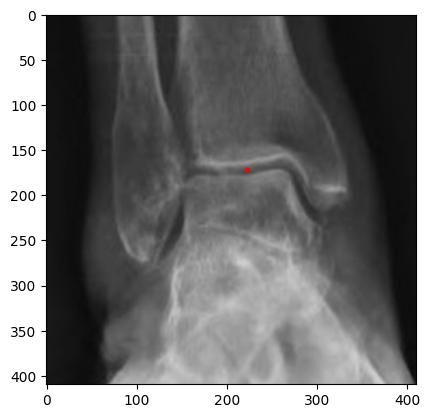

038
[194. 193.]


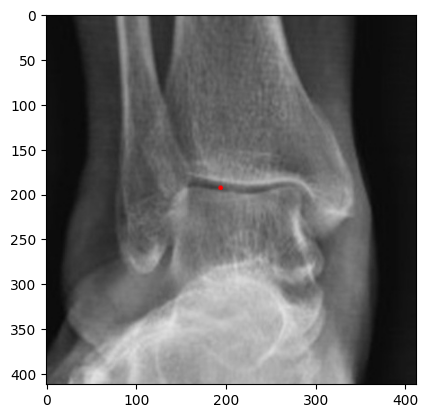

039
[234. 171.]


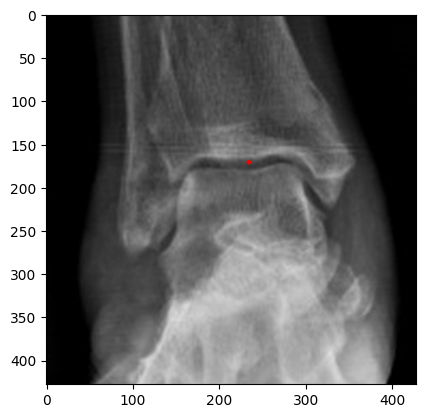

040
[234.5 172. ]


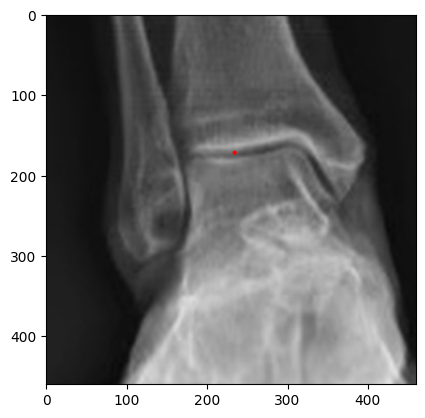

In [10]:
for i in range(1,41):
    a = False
    num = "{:03d}".format(i)
    print(num)
    # print(f"../../dev_talus_res/left/{num}.jpg")
    img = cv2.imread(f"../../dev_talus_res/left/{num}.jpg")
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width = imgGray.shape
    th3 = cv2.adaptiveThreshold(imgGray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,31,5)

    knee = cv2.medianBlur(th3,7)

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
    knee_erosion = cv2.erode(knee,kernel,iterations = 1)

    lines = cv2.HoughLinesP(knee_erosion, 1, np.pi/180, threshold=50, minLineLength=30, maxLineGap=1) # old theta np.pi/180

    filtered_lines = filter_line(lines)
    if(len(filtered_lines) == 0):
        a = True
        kernel = np.array([[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]], dtype=np.uint8)
        knee_dilate = cv2.dilate(knee_erosion,kernel,iterations = 1)
        lines = cv2.HoughLinesP(knee_dilate, 1, np.pi/180, threshold=50, minLineLength=20, maxLineGap=1) # old theta np.pi/180
        filtered_lines = filter_line(lines)


    selected_line = select_line_slope(filtered_lines)

    x1, y1, x2, y2 = selected_line
    m = midpoint(np.array([x1,y1]), np.array([x2,y2]))
    print(m)
    if(a):
        print("yes")
    image = cv2.circle(img, (int(m[0]), int(m[1])), 1, [255,0,0], 2)
    plt.imshow(image)
    plt.show()